In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Data Loading


In [2]:
import numpy as np # used for handling the numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# Filtering out the warnings after Cell Execution
import warnings
warnings.filterwarnings("ignore")

# prep
from sklearn.model_selection import train_test_split   # used for splitting the training and testing data
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import binarize

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 


# Any results you write to the current directory are saved as output.

# read csv file into a DataFrame
df = pd.read_csv('/content/drive/My Drive/mentalHealthSurvey.csv')
df.head()     #this prints randomly any 5 tuples of the dataframe

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.shape

(1259, 27)

# Sanity Checking/Basic Preprocessing

In [4]:
#missing data
# Here calculated percentage of data for each column which is missing
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [5]:
#dealing with missing data
#Getting rid of the variables "Timestamp",“comments”, “state” as it won't help in prediction
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)

df.isnull().sum().max() #just checking that there's no missing data missing...
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [6]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(5) 

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:
#clean 'Gender'
#Slower case all columm's elements
gender = df['Gender'].str.lower()

#Select unique elements
gender = df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [8]:
# As above we got there are varities of gender
# So, here we make a list to categegorise all of them as 3 genders that everyone knows of "male, female and trans"

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())   # will get only three unique genders

['female' 'male' 'trans']


In [9]:
#complete missing age with mean
df['Age'].fillna(df['Age'].median(), inplace = True)

# Filling with median() for age values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


In [10]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [11]:
#There are only 0.20% of self work_interfere so changing NaN to "Don't know
#Replace "NaN" string from defaultString

df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [12]:
#Get rid of 'Country'
df = df.drop(['Country'], axis= 1)
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,No,No,No,Rarely,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,No,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


In [13]:
#Encoding data
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_cow

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [14]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

## Train/Test Splitting

In [15]:
# As we need to split the data for 
# 1. train set:- on which we are going to learn our model
# 3. test set: on which we will see how the model is going to behave in real world

In [16]:
df.shape

(1257, 24)

In [17]:
feature_cols = ['Age',	'Gender',	'self_employed',	'family_history',	'treatment',	'work_interfere',	'no_employees',	'remote_work',	'tech_company',	'benefits',	'care_options',	'wellness_program',	'seek_help',	'anonymity',	'leave',	'mental_health_consequence',	'phys_health_consequence',	'coworkers', 'supervisor',	'mental_health_interview',	'phys_health_interview',	'mental_vs_physical',	'obs_consequence',	'age_range']
X = df[feature_cols]
y = df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

In [18]:
print(X_train.shape)
print(X_test.shape)

(879, 24)
(378, 24)


# Data Exploration

## Basic Information check

In [19]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        879 non-null    int64
 1   Gender                     879 non-null    int64
 2   self_employed              879 non-null    int64
 3   family_history             879 non-null    int64
 4   treatment                  879 non-null    int64
 5   work_interfere             879 non-null    int64
 6   no_employees               879 non-null    int64
 7   remote_work                879 non-null    int64
 8   tech_company               879 non-null    int64
 9   benefits                   879 non-null    int64
 10  care_options               879 non-null    int64
 11  wellness_program           879 non-null    int64
 12  seek_help                  879 non-null    int64
 13  anonymity                  879 non-null    int64
 14  leave                     

In [20]:
#confirm that no column has null values
X_train.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

In [21]:
X_train.nunique()          # knowing the unique values in each column

Age                          42
Gender                        3
self_employed                 2
family_history                2
treatment                     2
work_interfere                5
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
age_range                     3
dtype: int64

In [22]:
X_train.describe()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,13.585893,0.822526,0.111490,0.366325,0.484642,2.226394,2.779295,0.286689,0.831627,1.040956,...,1.402730,0.853242,0.831627,0.990899,1.119454,0.860068,0.730375,0.833902,0.128555,1.497156
std,6.996848,0.429963,0.314918,0.482074,0.500049,1.625518,1.721889,0.452473,0.374410,0.837970,...,1.514333,0.754688,0.471368,0.614857,0.840637,0.431911,0.729386,0.838801,0.334898,0.535465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,13.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,17.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,43.000000,2.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,...,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000


here we notice that mean value is greater than median value of column which is represented by 50th percentile(50%).....and a small difference between 75th %ile and max values.

## Correlation Matrix

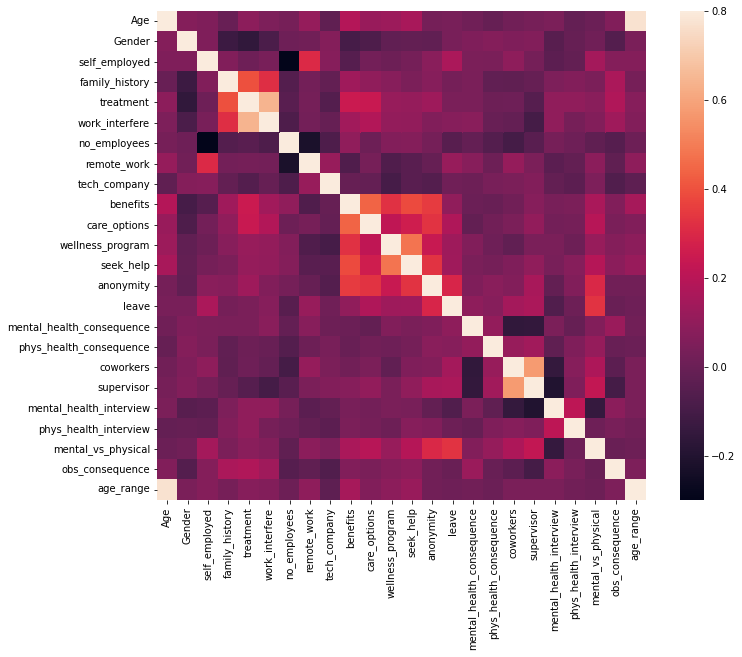

In [23]:
#correlation matrix
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

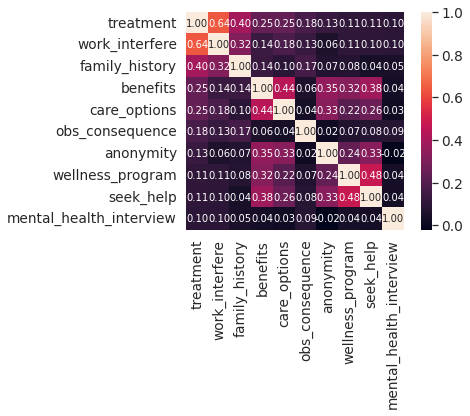

In [24]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Some charts to see data relationship

Text(0.5, 0, 'Age')

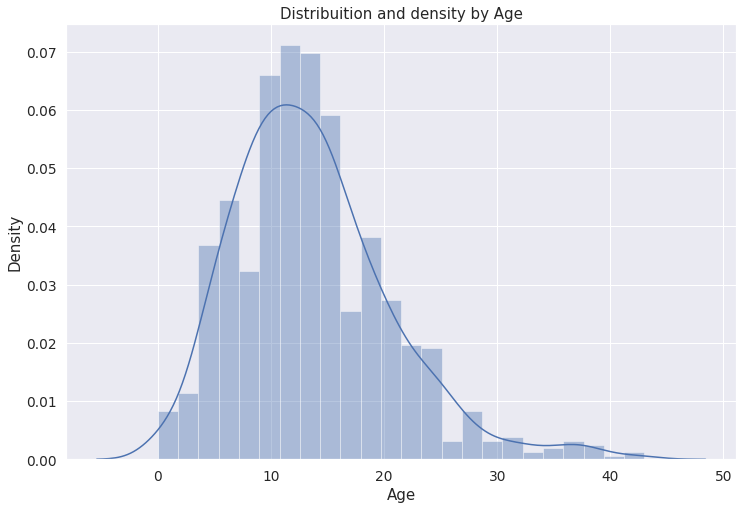

In [25]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(X_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

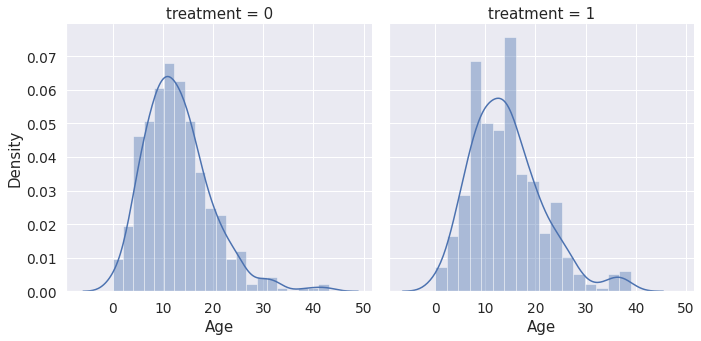

In [26]:
# Separate by treatment or not

g = sns.FacetGrid(X_train, col='treatment', height=5)
g = g.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Total Distribuition by treated or not')

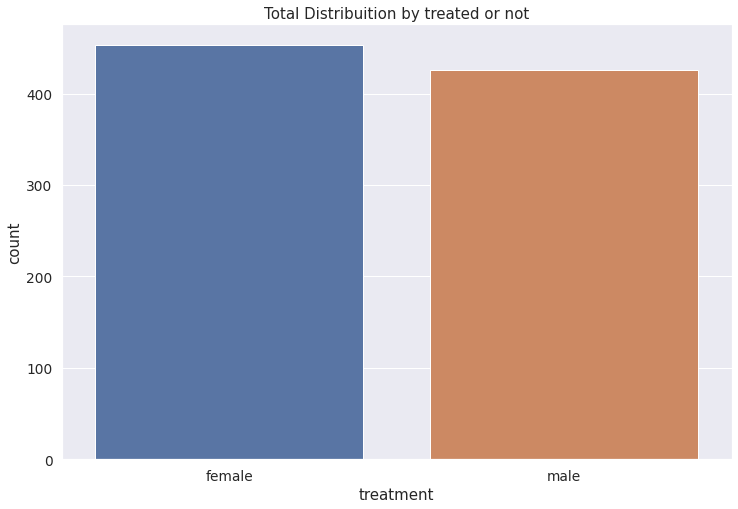

In [27]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=X_train)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

A nested barplot to show probabilities for class and sex

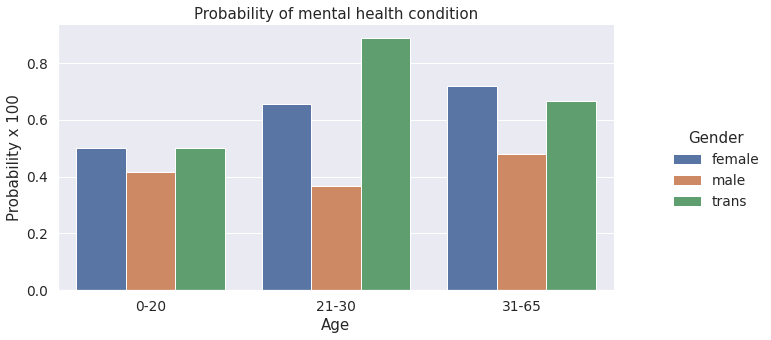

In [28]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=X_train, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for family history



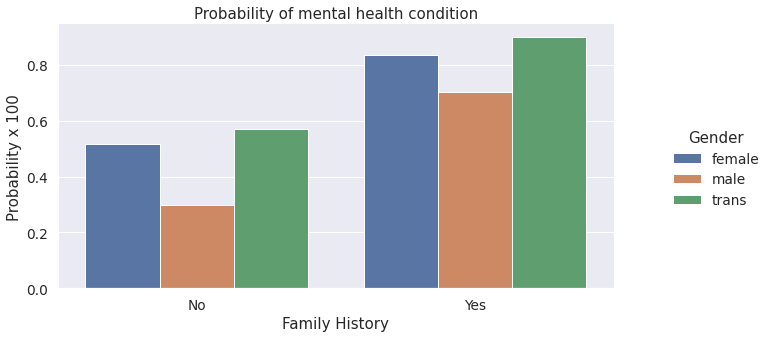

In [29]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=X_train, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for care options

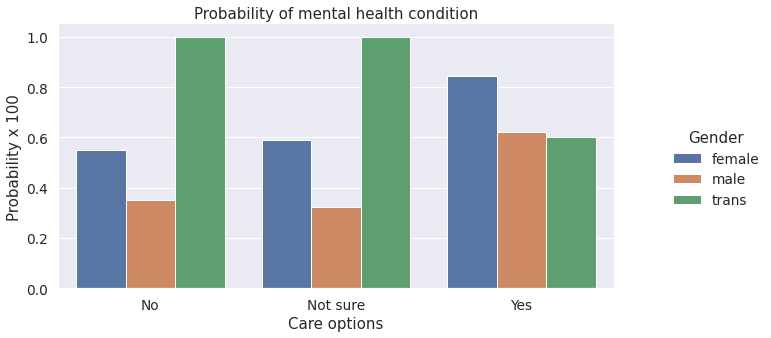

In [30]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=X_train, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for benefits

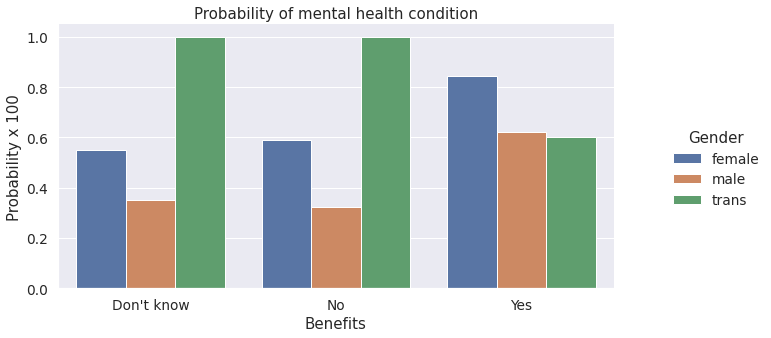

In [31]:
o = labelDict['label_benefits']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=X_train, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for work interfere

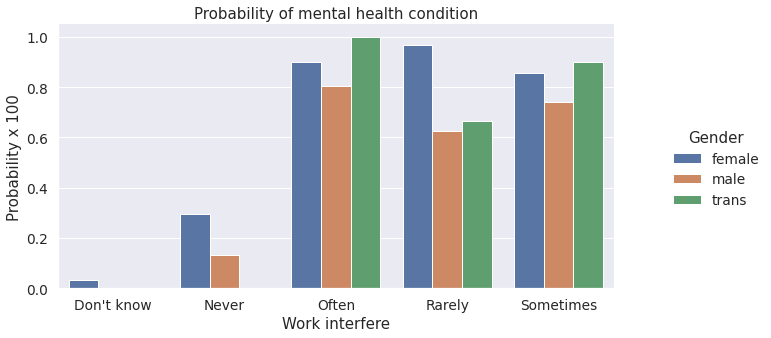

In [32]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=X_train, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

# Feature Scaling

We are going to scale age, because it is extremely different from the other ones.

In [33]:
# Scaling Age on train set
scaler = MinMaxScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_train.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.441860,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.604651,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.325581,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.302326,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.302326,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [34]:
# Scaling Age on test set
scaler = MinMaxScaler()
X_test['Age'] = scaler.fit_transform(X_test[['Age']])
X_test.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
879,0.279070,1,0,0,1,1,2,0,1,2,...,4,0,1,0,0,1,1,0,0,2
880,0.232558,1,0,1,1,4,2,0,1,0,...,0,0,1,1,1,1,1,2,0,1
881,0.255814,1,0,0,0,1,2,1,1,2,...,4,1,1,1,2,0,0,2,0,1
882,0.418605,1,0,0,0,1,3,1,1,2,...,0,0,1,1,2,1,1,2,1,2
883,0.395349,1,1,0,0,1,0,0,1,2,...,1,1,1,1,2,2,2,2,0,2


# Feature Selection

Feature selection using ExtraTreeClassifier.

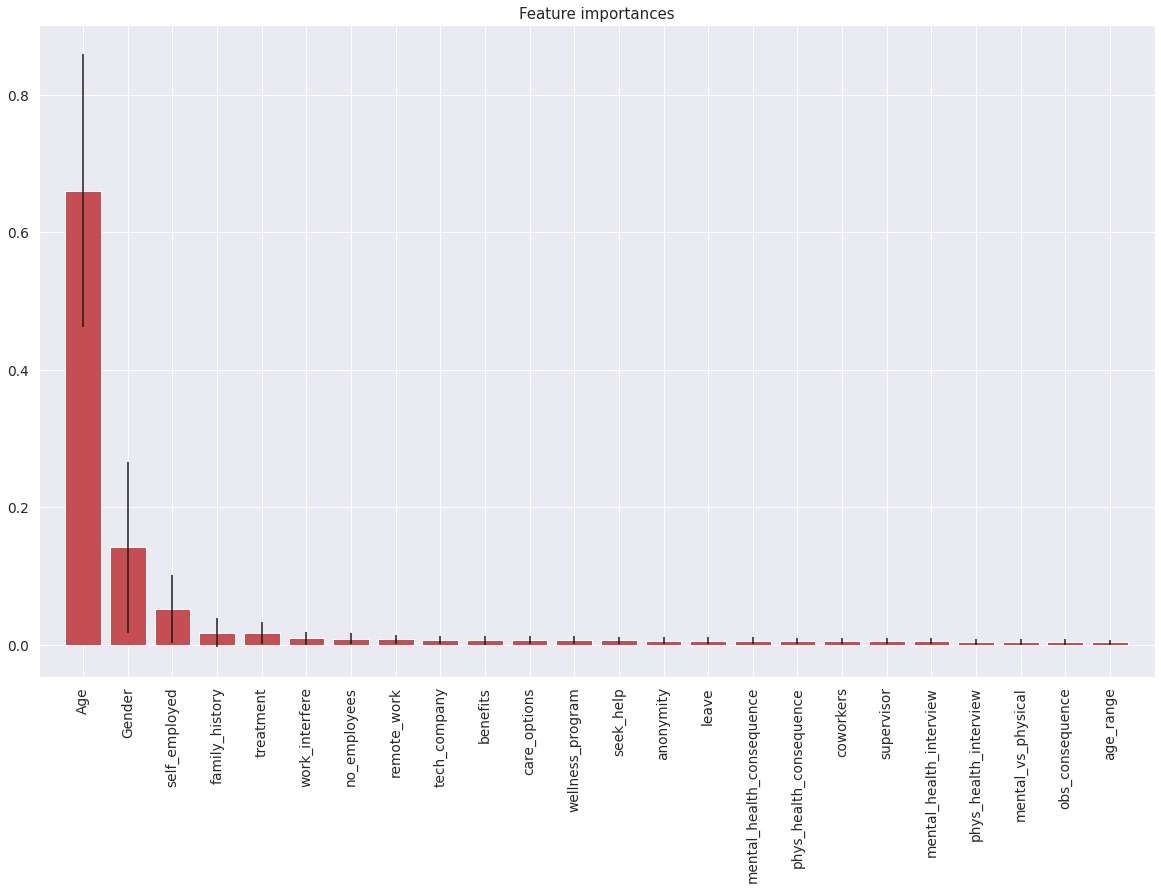

In [35]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(20,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


In [36]:
#print(importances[indices])
display(importances)

array([0.00777767, 0.0091451 , 0.00329774, 0.05224358, 0.66065011,
       0.14188348, 0.00642176, 0.0047451 , 0.00377279, 0.01642199,
       0.01720432, 0.00508067, 0.00553241, 0.00652746, 0.00652274,
       0.00638042, 0.0044148 , 0.00689777, 0.00599544, 0.00406289,
       0.00591692, 0.00557534, 0.00851435, 0.00501519])

In [37]:
#storing the important features inside a column and creating a separate dataframe which will be fed into the model
selected_cols = X_train[['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']]
X_train_top8 = selected_cols.copy()

In [38]:
#storing the important features inside a column and creating a separate dataframe which will be fed into the model
selected_cols = X_test[['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']]
X_test_top8 = selected_cols.copy()

# Tuning

Model tuning allows us to customize our models so they generate the most accurate outcomes and give us highly valuable insights into your data, enabling us to make the most effective business decisions.

In [39]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())


    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test_top8)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test_top8)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test_top8)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test_top8)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, threshold=0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])


    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    return accuracy

Tuning with RandomizedSearchCV

In [40]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X_train_top8, y_train)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)



# Evaluating Models

In [41]:
# This will be used for final graph plot for all models.
methodDict = {}

Logistic Regression

In [42]:
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score

def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train_top8, y_train)
    
    # make class predictions for the testing set
    predicted = logreg.predict(X_test_top8)
    
    print('*** Logistic Regression ***')

    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    #score = metrics.accuracy_score(y_test, predicted)
    #print('Accuracy : ', score)

    score = evalClassModel(logreg, y_test, predicted, True)
    
    #Data for final graph
    methodDict['Logistic Regression'] = score * 100

*** Logistic Regression ***
Accuracy: 0.7724867724867724
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0]


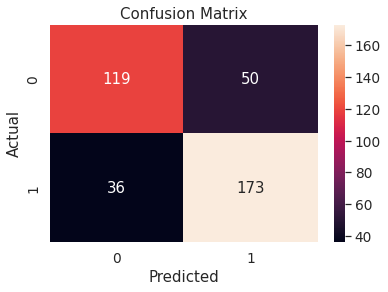

Classification Accuracy: 0.7724867724867724
Classification Error: 0.22751322751322756
False Positive Rate: 0.2958579881656805
Precision: 0.7757847533632287
AUC Score: 0.7659466040032842
Cross-validated AUC: 1.0
First 10 predicted responses:
 [0 1 0 0 0 1 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.78122218 0.21877782]
 [0.14140294 0.85859706]
 [0.78425364 0.21574636]
 [0.84912154 0.15087846]
 [0.86068836 0.13931164]
 [0.044503   0.955497  ]
 [0.77653715 0.22346285]
 [0.60889931 0.39110069]
 [0.73285305 0.26714695]
 [0.96622497 0.03377503]]
First 10 predicted probabilities:
 [[0.21877782]
 [0.85859706]
 [0.21574636]
 [0.15087846]
 [0.13931164]
 [0.955497  ]
 [0.22346285]
 [0.39110069]
 [0.26714695]
 [0.03377503]]


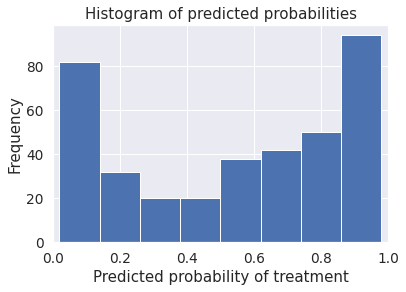

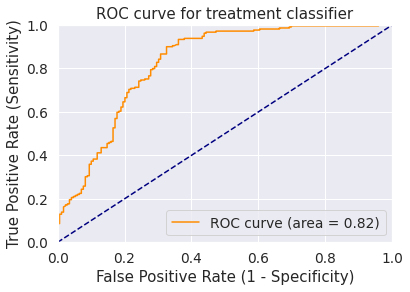

[[119  50]
 [ 36 173]]


In [43]:
logisticRegression()

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
def randomForest():
  # train a Random Forest classifier model on the training set
  # Calculating the best parameters
  forest = RandomForestClassifier(n_estimators = 20)

  featuresSize = selected_cols.__len__()
  param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 8),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  tuningRandomizedSearchCV(forest, param_dist)

  # Building and fitting RanForest
  forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
  RanForest = forest.fit(X_train_top8, y_train)

  # Predicting the Test Set Results
  predicted = RanForest.predict(X_test_top8)

  print('*** Random Forest ***')

  #Classification accuracy: percentage of correct predictions
  # calculate accuracy
  #score = metrics.accuracy_score(y_test, predicted)
  #print('Accuracy : ', score)

  score = evalClassModel(RanForest, y_test, predicted, True)

  #Data for final graph
  methodDict['Random Forest Classifier'] = score * 100

Rand. Best Score:  0.8350313479623825
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
*** Random Forest ***
Accuracy: 0.8068783068783069
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0]


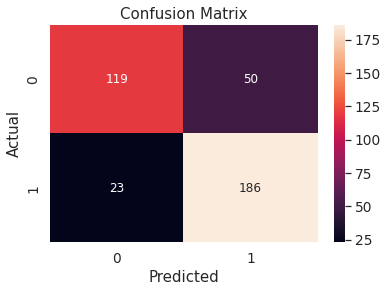

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.2958579881656805
Precision: 0.788135593220339
AUC Score: 0.7970470824721837
Cross-validated AUC: 1.0
First 10 predicted responses:
 [0 1 0 0 0 1 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.90543336 0.09456664]
 [0.21217404 0.78782596]
 [0.90513574 0.09486426]
 [0.90699327 0.09300673]
 [0.85890612 0.14109388]
 [0.14232495 0.85767505]
 [0.62738085 0.37261915]
 [0.54963639 0.45036361]
 [0.71434338 0.28565662]
 [0.95347619 0.04652381]]
First 10 predicted probabilities:
 [[0.09456664]
 [0.78782596]
 [0.09486426]
 [0.09300673]
 [0.14109388]
 [0.85767505]
 [0.37261915]
 [0.45036361]
 [0.28565662]
 [0.04652381]]


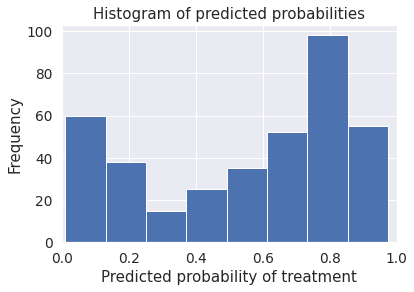

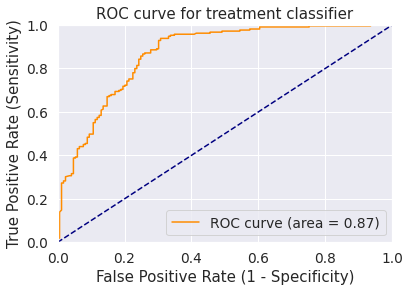

[[119  50]
 [ 23 186]]


In [45]:
randomForest()

Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
def decisionTree():
  # train a Decision Tree model on the training set
  # Calculating the best parameters
  tree = DecisionTreeClassifier()
 
  featuresSize = selected_cols.__len__()
  param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 8),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  tuningRandomizedSearchCV(tree, param_dist)

  # train a decision tree model on the training set
  tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=8, criterion='entropy', min_samples_leaf=7)
  tree.fit(X_train_top8, y_train)

  # Predicting the Test Set Results
  predicted = tree.predict(X_test_top8)

  print('*** Decision Tree ***')

  #Classification accuracy: percentage of correct predictions
  # calculate accuracy
  #score = metrics.accuracy_score(y_test, predicted)
  #print('Accuracy : ', score)

  score = evalClassModel(tree, y_test, predicted, True)

  #Data for final graph
  methodDict['Decision Tree Classifier'] = score * 100

Rand. Best Score:  0.8350313479623825
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}
[0.995, 0.966, 0.983, 0.984, 0.983, 0.916, 0.964, 0.972, 0.987, 0.979, 0.966, 0.963, 0.978, 0.951, 0.973, 0.956, 0.98, 0.991, 0.99, 0.988]
*** Decision Tree ***
Accuracy: 0.8201058201058201
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0]


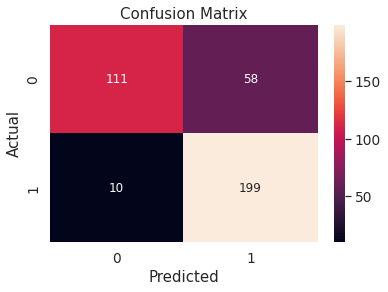

Classification Accuracy: 0.8201058201058201
Classification Error: 0.17989417989417988
False Positive Rate: 0.3431952662721893
Precision: 0.77431906614786
AUC Score: 0.8044789218878288
Cross-validated AUC: 0.963571944794943
First 10 predicted responses:
 [0 1 0 0 0 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.74       0.26      ]
 [0.14438503 0.85561497]
 [0.74       0.26      ]
 [0.74       0.26      ]
 [0.74       0.26      ]
 [0.14438503 0.85561497]
 [0.90196078 0.09803922]
 [0.43975904 0.56024096]
 [1.         0.        ]
 [1.         0.        ]]
First 10 predicted probabilities:
 [[0.26      ]
 [0.85561497]
 [0.26      ]
 [0.26      ]
 [0.26      ]
 [0.85561497]
 [0.09803922]
 [0.56024096]
 [0.        ]
 [0.        ]]


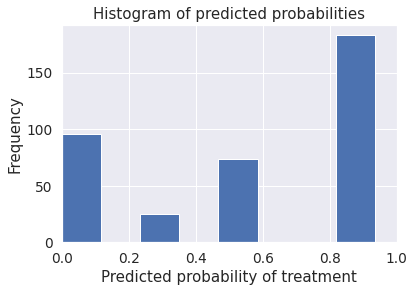

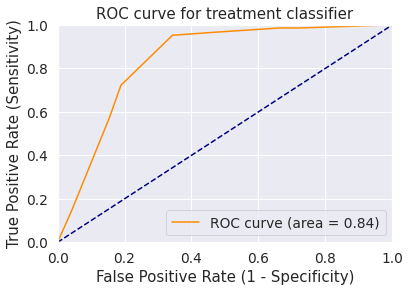

[[111  58]
 [ 10 199]]


In [47]:
decisionTree()

KNeighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
def knn():
  # train KNeighborsClassifier model on the training set
  # Calculating the best parameters
  knn = KNeighborsClassifier(n_neighbors=5)

  #tuningCV(knn)
  #tuningGridSerach(knn)
  #tuningMultParam(knn)
    
  # define the parameter values that should be searched
  k_range = list(range(1, 31))
  weight_options = ['uniform', 'distance']
    
  # specify "parameter distributions" rather than a "parameter grid"
  param_dist = dict(n_neighbors=k_range, weights=weight_options)
  tuningRandomizedSearchCV(knn, param_dist)

  # train KNeighborsClassifier model on the training set
  knn = KNeighborsClassifier(n_neighbors=27)
  knn.fit(X_train_top8, y_train)

  # Predicting the Test Set Results
  predicted = knn.predict(X_test_top8)

  print('*** KNeighbors Classifier ***')

  #Classification accuracy: percentage of correct predictions
  # calculate accuracy
  #score = metrics.accuracy_score(y_test, predicted)
  #print('Accuracy : ', score)

  score = evalClassModel(knn, y_test, predicted, True)

  #Data for final graph
  methodDict['KNN'] = score * 100

Rand. Best Score:  0.8191222570532917
Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 22}
[0.846, 0.846, 0.846, 0.846, 0.846, 0.846, 0.846, 0.845, 0.846, 0.846, 0.846, 0.846, 0.845, 0.846, 0.845, 0.846, 0.837, 0.845, 0.842, 0.845]
*** KNeighbors Classifier ***
Accuracy: 0.791005291005291
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0]


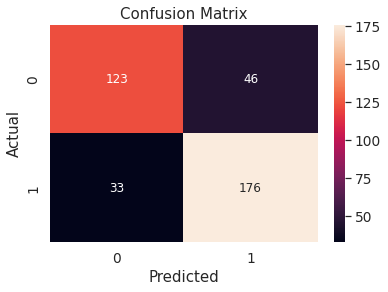

Classification Accuracy: 0.791005291005291
Classification Error: 0.20899470899470896
False Positive Rate: 0.27218934911242604
Precision: 0.7927927927927928
AUC Score: 0.7849579570227342
Cross-validated AUC: 0.9072260370695471
First 10 predicted responses:
 [0 1 0 0 0 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.74074074 0.25925926]
 [0.22222222 0.77777778]
 [0.74074074 0.25925926]
 [0.92592593 0.07407407]
 [0.92592593 0.07407407]
 [0.18518519 0.81481481]
 [0.7037037  0.2962963 ]
 [0.44444444 0.55555556]
 [0.77777778 0.22222222]
 [1.         0.        ]]
First 10 predicted probabilities:
 [[0.25925926]
 [0.77777778]
 [0.25925926]
 [0.07407407]
 [0.07407407]
 [0.81481481]
 [0.2962963 ]
 [0.55555556]
 [0.22222222]
 [0.        ]]


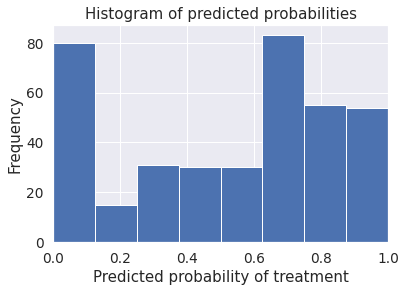

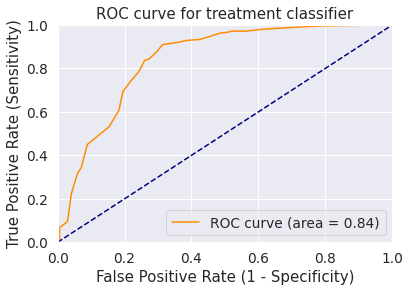

[[123  46]
 [ 33 176]]


In [49]:
knn()

Bagging

In [50]:
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
def bagging():
    # train bagging on the training set
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train_top8, y_train)

    # Predicting the Test Set Results
    predicted = bag.predict(X_test_top8)

    print('*** Bagging ***')

    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    #score = metrics.accuracy_score(y_test, predicted)
    #print('Accuracy : ', score)

    score = evalClassModel(bag, y_test, predicted, True)

    #Data for final graph
    methodDict['Bagging'] = score * 100

*** Bagging ***
Accuracy: 0.7592592592592593
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0]


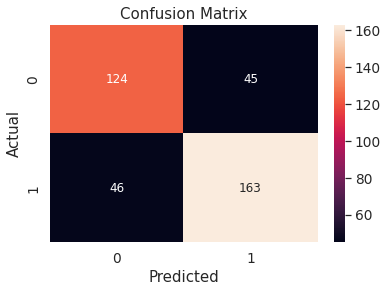

Classification Accuracy: 0.7592592592592593
Classification Error: 0.2407407407407407
False Positive Rate: 0.26627218934911245
Precision: 0.7836538461538461
AUC Score: 0.7568160584354916
Cross-validated AUC: 1.0
First 10 predicted responses:
 [0 1 0 0 0 1 0 0 0 0]
First 10 predicted probabilities of class members:
 [[1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.1 0.9]
 [0.9 0.1]
 [0.7 0.3]
 [1.  0. ]
 [1.  0. ]]
First 10 predicted probabilities:
 [[0. ]
 [1. ]
 [0. ]
 [0. ]
 [0.1]
 [0.9]
 [0.1]
 [0.3]
 [0. ]
 [0. ]]


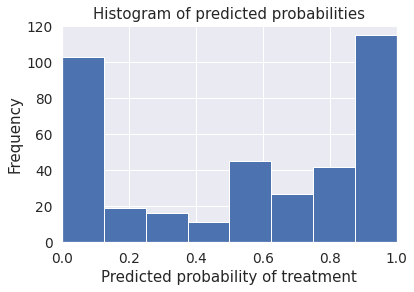

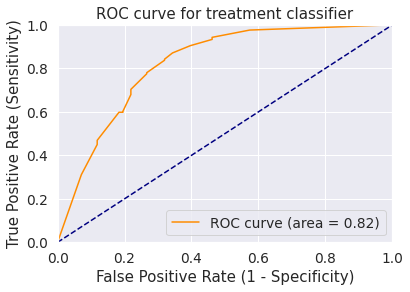

[[124  45]
 [ 46 163]]


In [51]:
bagging()

Naive Bayers

In [52]:
from sklearn.naive_bayes import GaussianNB
def gaussianNB():
    # train gaussian naive bayers on the training set
    # Building and fitting 
    gnb = GaussianNB()
    gnb.fit(X_train_top8, y_train)

    # Predicting the Test Set Results
    predicted = gnb.predict(X_test_top8)

    print('*** Gaussian Naive Bayers ***')

    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    #score = metrics.accuracy_score(y_test, predicted)
    #print('Accuracy : ', score)

    score = evalClassModel(gnb, y_test, predicted, True)

    #Data for final graph
    methodDict['Gaussian Naive Bayers'] = score * 100

*** Gaussian Naive Bayers ***
Accuracy: 0.7804232804232805
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0]


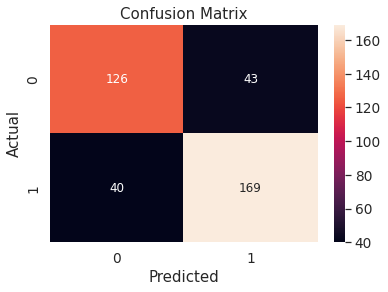

Classification Accuracy: 0.7804232804232805
Classification Error: 0.21957671957671954
False Positive Rate: 0.25443786982248523
Precision: 0.7971698113207547
AUC Score: 0.7770872851844512
Cross-validated AUC: 1.0
First 10 predicted responses:
 [0 1 0 0 0 1 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.87796871 0.12203129]
 [0.12939937 0.87060063]
 [0.87999494 0.12000506]
 [0.98191268 0.01808732]
 [0.98101447 0.01898553]
 [0.01631855 0.98368145]
 [0.93472451 0.06527549]
 [0.78551223 0.21448777]
 [0.95101985 0.04898015]
 [0.99886653 0.00113347]]
First 10 predicted probabilities:
 [[0.12203129]
 [0.87060063]
 [0.12000506]
 [0.01808732]
 [0.01898553]
 [0.98368145]
 [0.06527549]
 [0.21448777]
 [0.04898015]
 [0.00113347]]


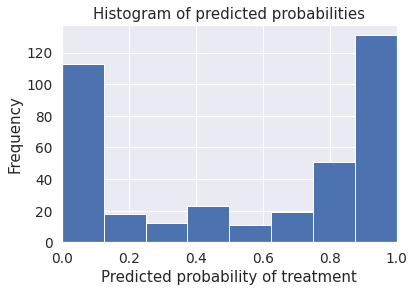

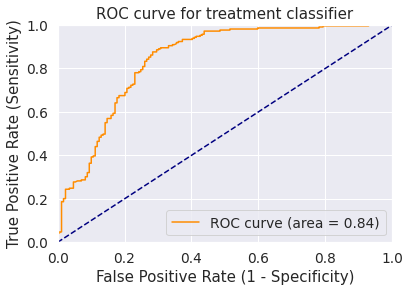

[[126  43]
 [ 40 169]]


In [53]:
gaussianNB()

Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
def GradientBoosting():
    grad = GradientBoostingClassifier(n_estimators = 30)
    featuresSize = selected_cols.__len__()
    param_dist = {"n_estimators" : randint(20, 30), 
              "max_depth": [3, None],
              "max_features": randint(1, 8),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9)}
    tuningRandomizedSearchCV(grad, param_dist)
    # train gradient boosting on the training set
    # Building and fitting 
    grad = GradientBoostingClassifier(max_depth = 3, max_features = 8, min_samples_leaf = 6, min_samples_split = 4, n_estimators = 20)
    grad.fit(X_train_top8, y_train)

    # Predicting the Test Set Results
    predicted = grad.predict(X_test_top8)

    print('*** Gradient Boosting ***')

    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    #score = metrics.accuracy_score(y_test, predicted)
    #print('Accuracy : ', score)

    score = evalClassModel(grad, y_test, predicted, True)

    #Data for final graph
    methodDict['Gradient Boosting Classifier'] = score * 100

Rand. Best Score:  0.8338949843260188
Rand. Best Params:  {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 20}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
*** Gradient Boosting ***
Accuracy: 0.8227513227513228
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0]


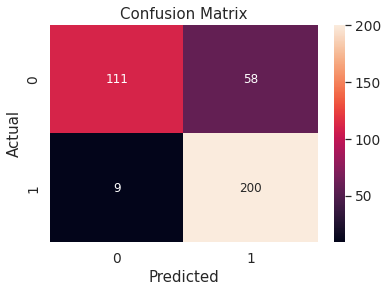

Classification Accuracy: 0.8227513227513228
Classification Error: 0.1772486772486772
False Positive Rate: 0.3431952662721893
Precision: 0.7751937984496124
AUC Score: 0.8068712663854365
Cross-validated AUC: 1.0
First 10 predicted responses:
 [0 1 0 0 0 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.81852708 0.18147292]
 [0.23694435 0.76305565]
 [0.81852708 0.18147292]
 [0.81852708 0.18147292]
 [0.81852708 0.18147292]
 [0.18396243 0.81603757]
 [0.79084369 0.20915631]
 [0.46383119 0.53616881]
 [0.91497623 0.08502377]
 [0.92971418 0.07028582]]
First 10 predicted probabilities:
 [[0.18147292]
 [0.76305565]
 [0.18147292]
 [0.18147292]
 [0.18147292]
 [0.81603757]
 [0.20915631]
 [0.53616881]
 [0.08502377]
 [0.07028582]]


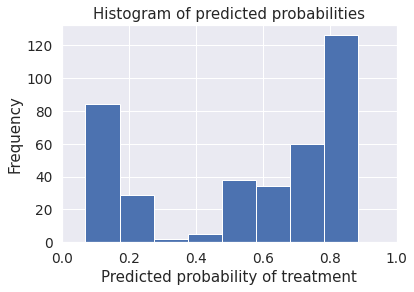

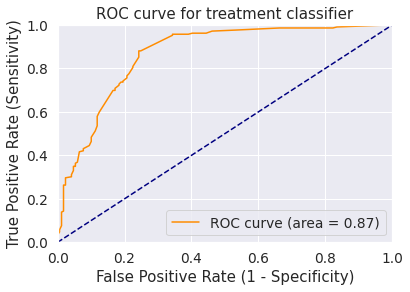

[[111  58]
 [  9 200]]


In [55]:
GradientBoosting()

SVC

In [56]:
from sklearn.svm import SVC
def svc():
    # train svc on the training set
    # Building a Support Vector Machine on train data
    svc_model = SVC(C= .1, kernel='linear', gamma= 1, probability=True)
    svc_model.fit(X_train_top8, y_train)

    # Predicting the Test Set Results
    predicted = svc_model.predict(X_test_top8)

    print('*** SVC ***')

    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    #score = metrics.accuracy_score(y_test, predicted)
    #print('Accuracy : ', score)
    score = evalClassModel(svc_model, y_test, predicted, True)

    #Data for final graph
    methodDict['SVC'] = score * 100

*** SVC ***
Accuracy: 0.7777777777777778
Null accuracy:
 1    209
0    169
Name: treatment, dtype: int64
Percentage of ones: 0.5529100529100529
Percentage of zeros: 0.4470899470899471
True: [1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0]


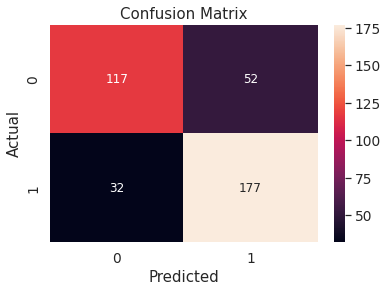

Classification Accuracy: 0.7777777777777778
Classification Error: 0.2222222222222222
False Positive Rate: 0.3076923076923077
Precision: 0.7729257641921398
AUC Score: 0.7695988222304012
Cross-validated AUC: 1.0
First 10 predicted responses:
 [0 1 0 0 0 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.79776187 0.20223813]
 [0.13929614 0.86070386]
 [0.79813239 0.20186761]
 [0.85232504 0.14767496]
 [0.85844572 0.14155428]
 [0.06923396 0.93076604]
 [0.81254446 0.18745554]
 [0.53211911 0.46788089]
 [0.84786733 0.15213267]
 [0.9525522  0.0474478 ]]
First 10 predicted probabilities:
 [[0.20223813]
 [0.86070386]
 [0.20186761]
 [0.14767496]
 [0.14155428]
 [0.93076604]
 [0.18745554]
 [0.46788089]
 [0.15213267]
 [0.0474478 ]]


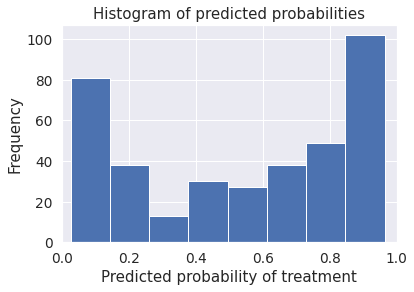

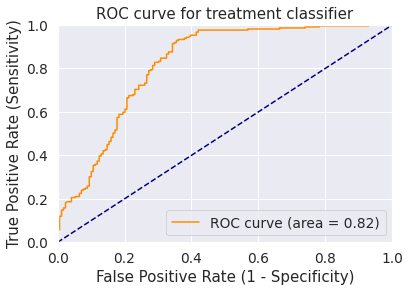

[[121  48]
 [ 41 168]]


In [57]:
svc()

# Success Model Plot

In [58]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

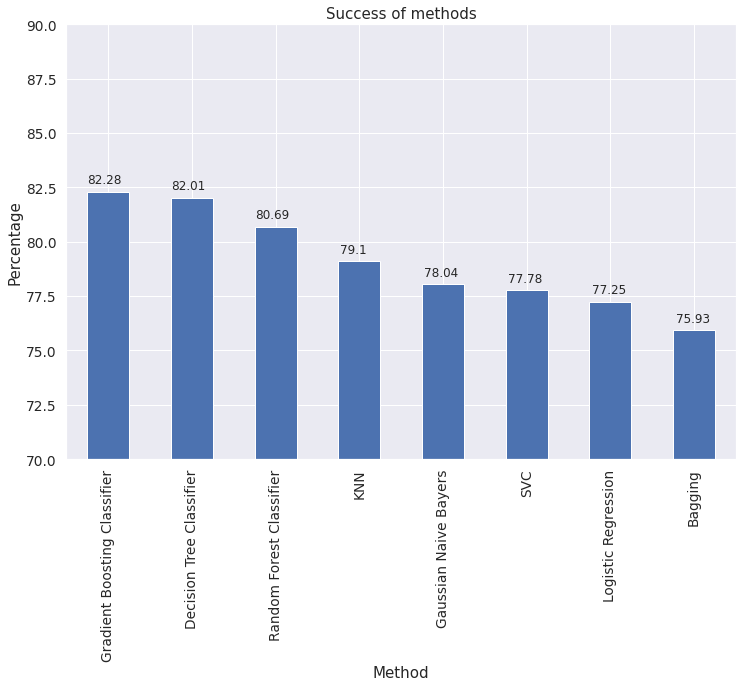

In [59]:
plotSuccess()

# Final Prediction on Test Set

In [60]:
# These are the top eight columns which were selected during feature selection
X_test_top8.head(10)

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere
879,0.279070,1,0,2,2,2,4,1
880,0.232558,1,1,0,1,0,0,4
881,0.255814,1,0,2,2,2,4,1
882,0.418605,1,0,2,0,0,0,1
883,0.395349,1,0,2,0,0,1,1
884,0.372093,1,1,2,2,0,0,4
885,0.511628,1,1,0,0,0,0,1
886,0.279070,1,0,0,1,0,0,3
887,0.441860,1,1,2,2,0,2,0
888,0.162791,1,0,1,0,2,4,0


In [61]:
# Generate predictions with the best method
# As Gradient boosting classifier is giving best accuracy in our case. So, we'll use it for final prediction.
clf = GradientBoostingClassifier()
clf.fit(X_train_top8, y_train)
finalTestPredictions = clf.predict(X_test_top8)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test_top8.index, 'Treatment': finalTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head(10)

,Index,Treatment
0,879,0
1,880,1
2,881,0
3,882,0
4,883,0
5,884,1
6,885,0
7,886,0
8,887,0
9,888,0
